In [28]:
# initiating gpu using tensorflow.
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

In [29]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline

In [30]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import load_model
import keras

In [31]:
train = '../input/train/'
test = '../input/test/'
img_size1 = 96
img_size2 = 96

In [32]:
cancer_files_train = pd.read_csv('../input/train_labels.csv')

In [33]:
cancer_files_train.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


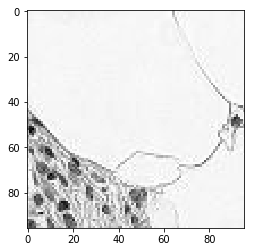

In [34]:
for i in range(len(cancer_files_train)):
        img_array = cv2.imread(os.path.join(train,cancer_files_train['id'][i]+'.tif'),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break

In [35]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for i in range(len(cancer_files_train)):
            img_array = cv2.imread(os.path.join(train,cancer_files_train['id'][i]+'.tif'),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,cancer_files_train['label'][i]])

In [36]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test):
        img_array = cv2.imread(os.path.join(test,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])

In [37]:
create_training_data()

In [38]:
create_testing_data()

In [39]:
print(len(training_data))
print(len(testing_data))

220025
57458


In [40]:
random.shuffle(training_data)

In [41]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

X = np.array(x).reshape(-1,img_size2,img_size1,1)

In [42]:
X.shape

(220025, 96, 96, 1)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

Y_train = np_utils.to_categorical(y_train,num_classes=2)
Y_test = np_utils.to_categorical(y_test,num_classes=2)

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(32,kernel_size=(3,3),strides=1,activation='relu',input_shape=(img_size1,img_size1,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [59]:
model.add(Conv2D(64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))


In [60]:
model.add(Conv2D(128,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [61]:
model.add(Conv2D(256,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [62]:
model.add(Conv2D(512,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [63]:
model.add(Conv2D(1024,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(1024,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [64]:
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
batch_normalization_26 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 94, 94, 32)        9248      
_________________________________________________________________
batch_normalization_27 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [66]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [67]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]

In [70]:
batch_size = 25
n_epochs = 100
results = model.fit(x_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test))

Train on 154017 samples, validate on 66008 samples
Epoch 1/100
154017/154017 [==============================] - 257s 2ms/step - loss: 0.2011 - acc: 0.9250 - val_loss: 0.2196 - val_acc: 0.9094
Epoch 2/100
154017/154017 [==============================] - 255s 2ms/step - loss: 0.1875 - acc: 0.9304 - val_loss: 0.2369 - val_acc: 0.9064
Epoch 3/100
154017/154017 [==============================] - 254s 2ms/step - loss: 0.1837 - acc: 0.9318 - val_loss: 0.2755 - val_acc: 0.8996
Epoch 4/100
154017/154017 [==============================] - 255s 2ms/step - loss: 0.1800 - acc: 0.9328 - val_loss: 0.1958 - val_acc: 0.9249
Epoch 5/100
154017/154017 [==============================] - 255s 2ms/step - loss: 0.1761 - acc: 0.9353 - val_loss: 0.1747 - val_acc: 0.9284
Epoch 6/100
154017/154017 [==============================] - 254s 2ms/step - loss: 0.1695 - acc: 0.9381 - val_loss: 0.1913 - val_acc: 0.9252
Epoch 7/100
154017/154017 [==============================] - 255s 2ms/step - loss: 0.1681 - acc: 0.9382

KeyboardInterrupt: 

In [77]:
model.save_weights('./cell_classification_lr_weights.h5', overwrite=True)

In [78]:
model.save('./cell_classification_lr.h5')

In [73]:
model = load_model('../working/cell_classification_lr.h5')

In [74]:
test_data = np.array(testing_data[0][1]).reshape(-1,img_size2,img_size1,1)

In [75]:
preds = model.predict(test_data)

In [76]:
preds

array([[0.96848035, 0.03151963]], dtype=float32)